In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from numpy import nan
import plotly.express as px
import chart_studio

In [2]:
mofs = pd.read_excel('Conductivites_Data.xlsx')
mofs['Porosity'] = [row if row>0 else 0.001 for row in mofs['BET']]

In [17]:
mofs

,Name,Dimensionality,BET,Porous,Year,Value,DOI,Porosity
0,Pb3(BHT),3D,NaN,No,2008,2.000000e-06,10.1021/ja0770983,0.001
1,Cu[Cu(pdt)2],3D,NaN,Yes,2009,6.000000e-04,10.1021/ic802117q,0.001
2,Cu[Ni(pdt)2],3D,385.0,Yes,2010,1.000000e-08,10.1021/cm101238m,385.000
3,I2@Zn3(lac)2(pybz)2,3D,NaN,Yes,2010,3.400000e-03,10.1021/ja908293n,0.001
4,"Fe(1,2,3-triazolate) (oxidized)",3D,450.0,Yes,2012,7.700000e-05,10.1002/chem.201103433,450.000
5,Cu3(HOTP)2,2D layered,306.0,Yes,2012,1.000000e-01,10.1021/cm301194a,306.000
6,Ni3(BHT)2,2D layered,NaN,Yes,2013,1.500000e-01,10.1021/ja312380b,0.001
7,Pt3(THT)2,2D layered,300.0,Yes,2014,1.400000e-06,10.1039/C4CC00408F,300.000
8,Ni3(BHT)2 oxidized,2D layered,NaN,Yes,2014,1.500000e+02,10.1021/ja507619d,0.001
9,Ni3(HITP)2,2D layered,630.0,Yes,2014,4.000000e+01,10.1021/ja502765n,630.000


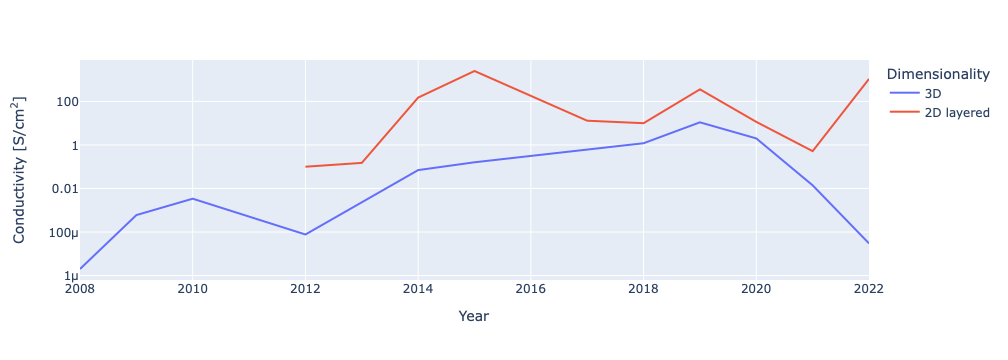

In [18]:
mofs_sorted_2D = mofs.loc[mofs[mofs['Dimensionality']=='2D layered'].groupby('Year')['Value'].idxmax()]
mofs_sorted_3D = mofs.loc[mofs[mofs['Dimensionality']=='3D'].groupby('Year')['Value'].idxmax()]
mofs_sorted = pd.concat([mofs_sorted_3D, mofs_sorted_2D], ignore_index=True)
fig2 = px.line(mofs_sorted, x='Year', y='Value', color='Dimensionality', hover_data=['Dimensionality','Porosity'], 
                 labels={'Value': "Conductivity [S/cm<sup>2</sup>]"}, hover_name='Name')
fig2.update_traces(hovertemplate='<b>%{hovertext}</b><br><br>Dimensionality=%{customdata[0]}\
                                 <br>Year=%{x}<br>Value=%{y} S/cm<sup>2</sup>\
                                 <br>Porosity=%{customdata[1]} m<sup>2</sup>/g<extra></extra>')
fig2.update_layout(yaxis_type="log")
fig2.show()

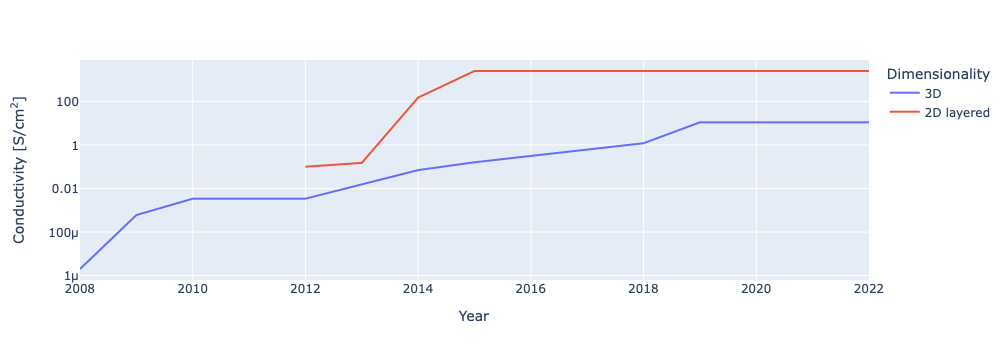

In [19]:
mofs_sorted_3D_cummax = mofs_sorted_3D
mofs_sorted_3D_cummax['cummax_value'] = mofs_sorted_3D_cummax.Value.cummax()
keep_3D = mofs_sorted_3D_cummax['cummax_value']<=mofs_sorted_3D_cummax.Value
mofs_sorted_3D_cummax.loc[~keep_3D, ['Value', 'Name', 'DOI', 'Porosity']] = nan
mofs_sorted_3D_cummax = mofs_sorted_3D_cummax.ffill()
#mofs_sorted_3D_cummax = mofs_sorted_3D_cummax[keep_3D]

mofs_sorted_2D_cummax = mofs_sorted_2D
mofs_sorted_2D_cummax['cummax_value'] = mofs_sorted_2D_cummax.Value.cummax()
keep_2D = mofs_sorted_2D_cummax['cummax_value']<=mofs_sorted_2D_cummax.Value
mofs_sorted_2D_cummax.loc[~keep_2D, ['Value', 'Name', 'DOI', 'Porosity']] = nan
mofs_sorted_2D_cummax = mofs_sorted_2D_cummax.ffill()
#mofs_sorted_2D_cummax = mofs_sorted_2D_cummax[keep_2D]

mofs_sorted_cummax = pd.concat([mofs_sorted_3D_cummax, mofs_sorted_2D_cummax], ignore_index=True)

fig5 = px.line(mofs_sorted_cummax, x='Year', y='Value', color='Dimensionality', hover_data=['Dimensionality','Porosity'], 
                 labels={'Value': "Conductivity [S/cm<sup>2</sup>]"}, hover_name='Name')
fig5.update_traces(hovertemplate='<b>%{hovertext}</b><br><br>Dimensionality=%{customdata[0]}\
                                 <br>Year=%{x}<br>Value=%{y} S/cm<sup>2</sup>\
                                 <br>Porosity=%{customdata[1]} m<sup>2</sup>/g<extra></extra>')
fig5.update_layout(yaxis_type="log")
fig5.show()

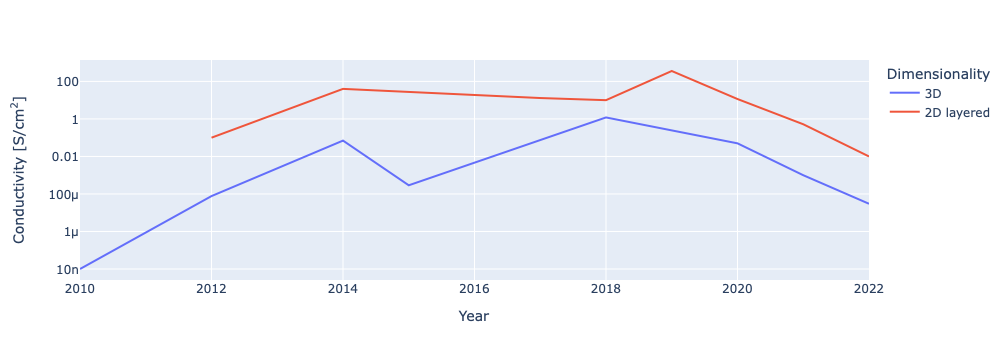

In [20]:
mofs_sorted_3D_porous = mofs.loc[mofs[(mofs['Dimensionality']=='3D') & (mofs['Porosity']>100)].groupby('Year')['Value'].idxmax()]
mofs_sorted_2D_porous = mofs.loc[mofs[(mofs['Dimensionality']=='2D layered') & (mofs['Porosity']>100)].groupby('Year')['Value'].idxmax()]
mofs_sorted_porous = pd.concat([mofs_sorted_3D_porous, mofs_sorted_2D_porous], ignore_index=True)
fig3 = px.line(mofs_sorted_porous, x='Year', y='Value', color='Dimensionality', hover_data=['Dimensionality','Porosity'], 
                 labels={'Value': "Conductivity [S/cm<sup>2</sup>]"}, hover_name='Name')
fig3.update_traces(hovertemplate='<b>%{hovertext}</b><br><br>Dimensionality=%{customdata[0]}\
                                 <br>Year=%{x}<br>Value=%{y} S/cm<sup>2</sup>\
                                 <br>Porosity=%{customdata[1]} m<sup>2</sup>/g<extra></extra>')
fig3.update_layout(yaxis_type="log")
fig3.show()

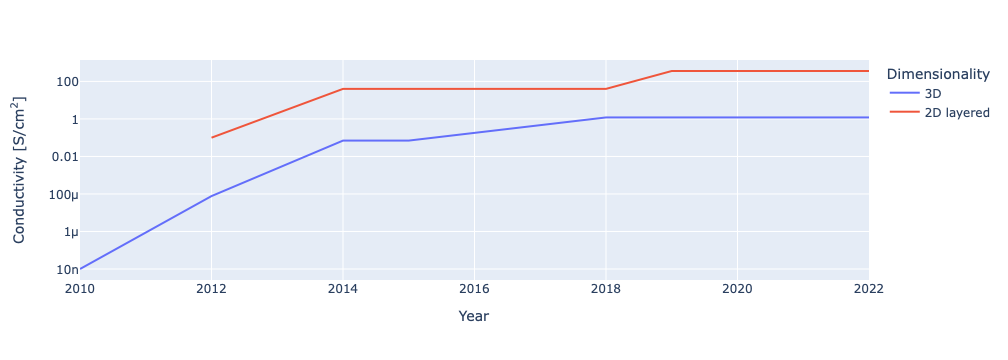

In [21]:
#mofs_sorted_3D_porous['cummax_value'] = mofs_sorted_3D_porous.Value.cummax()
#mofs_sorted_3D_porous.merge(mofs_sorted_3D_porous.groupby('cummax_value')[['Name', 'Porosity']].first(), on='cummax_value')
mofs_sorted_3D_porous_cummax = mofs_sorted_3D_porous
mofs_sorted_3D_porous_cummax['cummax_value'] = mofs_sorted_3D_porous_cummax.Value.cummax()
keep_3D_porous = mofs_sorted_3D_porous_cummax['cummax_value']<=mofs_sorted_3D_porous_cummax.Value
mofs_sorted_3D_porous_cummax.loc[~keep_3D_porous, ['Value', 'Name', 'DOI', 'Porosity']] = nan
mofs_sorted_3D_porous_cummax = mofs_sorted_3D_porous_cummax.ffill()
#mofs_sorted_3D_porous_cummax = mofs_sorted_3D_porous_cummax[keep_3D_porous]

mofs_sorted_2D_porous_cummax = mofs_sorted_2D_porous
mofs_sorted_2D_porous_cummax['cummax_value'] = mofs_sorted_2D_porous_cummax.Value.cummax()
keep_2D_porous = mofs_sorted_2D_porous_cummax['cummax_value']<=mofs_sorted_2D_porous_cummax.Value
mofs_sorted_2D_porous_cummax.loc[~keep_2D_porous, ['Value', 'Name', 'DOI', 'Porosity']] = nan
mofs_sorted_2D_porous_cummax = mofs_sorted_2D_porous_cummax.ffill()
#mofs_sorted_2D_porous_cummax = mofs_sorted_2D_porous_cummax[keep_2D_porous]

mofs_sorted_porous_cummax = pd.concat([mofs_sorted_3D_porous_cummax, mofs_sorted_2D_porous_cummax], ignore_index=True)
fig4 = px.line(mofs_sorted_porous_cummax, x='Year', y='Value', color='Dimensionality', hover_data=['Dimensionality','Porosity'], 
                 labels={'Value': "Conductivity [S/cm<sup>2</sup>]"}, hover_name='Name')
fig4.update_traces(hovertemplate='<b>%{hovertext}</b><br><br>Dimensionality=%{customdata[0]}\
                                 <br>Year=%{x}<br>Value=%{y} S/cm<sup>2</sup>\
                                 <br>Porosity=%{customdata[1]} m<sup>2</sup>/g<extra></extra>')
fig4.update_layout(yaxis_type="log")
fig4.show()

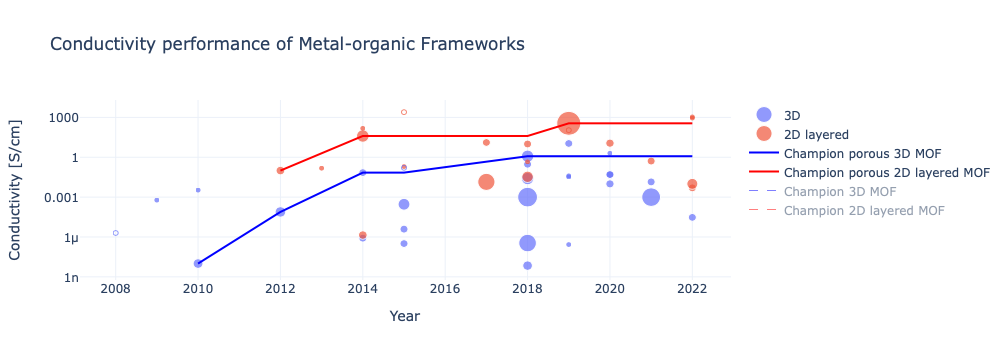

In [22]:
fig = px.scatter(mofs[mofs['BET']>1], x='Year', y='Value',
                 hover_name='Name', color='Dimensionality', size='Porosity', hover_data=['Dimensionality','Porosity', 'DOI'], 
                 labels={'Value': "Conductivity [S/cm]"}, template='plotly_white', 
                 title='Conductivity performance of Metal-organic Frameworks')

fig.update_traces(marker=dict(sizemin=4, sizeref=8))
fig.update_layout(yaxis_type="log")
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br><br>Dimensionality: %{customdata[0]}\
                                 <br>Year: %{x}<br>Value: %{y} S/cm\
                                 <br>BET: %{customdata[1]} m<sup>2</sup>/g<extra></extra>\
                                 <br>DOI: %{customdata[2]}')

fig.add_trace(go.Scatter(x=mofs[(mofs['Porous']=='Yes') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='3D')]['Year'], 
                         y=mofs[(mofs['Porous']=='Yes') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='3D')]['Value'], 
                         mode='markers', marker=dict(color='#636efa', size=5, opacity=0.7),  
                         customdata=np.stack((mofs[(mofs['Porous']=='Yes') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='3D')]['Name'], 
                                              mofs[(mofs['Porous']=='Yes') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='3D')]['Dimensionality'],
                                              mofs[(mofs['Porous']=='Yes') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='3D')]['DOI']), 
                                              axis=-1), 
                         hovertemplate='<b>%{customdata[0]}</b><br><br>Dimensionality: %{customdata[1]}\
                                 <br>Year: %{x}<br>Value: %{y} S/cm\
                                 <br>BET: unknown <extra></extra>\
                                 <br>DOI: %{customdata[2]}', 
                         showlegend=False))

fig.add_trace(go.Scatter(x=mofs[(mofs['Porous']=='Yes') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='2D layered')]['Year'], 
                         y=mofs[(mofs['Porous']=='Yes') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='2D layered')]['Value'], 
                         mode='markers', marker=dict(color='#EF553B', size=5, opacity=0.7),  
                         customdata=np.stack((mofs[(mofs['Porous']=='Yes') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='2D layered')]['Name'], 
                                              mofs[(mofs['Porous']=='Yes') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='2D layered')]['Dimensionality'],
                                              mofs[(mofs['Porous']=='Yes') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='2D layered')]['DOI']), 
                                              axis=-1), 
                         hovertemplate='<b>%{customdata[0]}</b><br><br>Dimensionality: %{customdata[1]}\
                                 <br>Year: %{x}<br>Value: %{y} S/cm\
                                 <br>BET: unknown <extra></extra>\
                                 <br>DOI: %{customdata[2]}', 
                         showlegend=False))

fig.add_trace(go.Scatter(x=mofs[(mofs['Porous']=='No') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='3D')]['Year'], 
                         y=mofs[(mofs['Porous']=='No') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='3D')]['Value'], 
                         mode='markers', marker=dict(color='#636efa', size=5, opacity=0.7, symbol='circle-open'),  
                         customdata=np.stack((mofs[(mofs['Porous']=='No') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='3D')]['Name'], 
                                              mofs[(mofs['Porous']=='No') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='3D')]['Dimensionality'],
                                              mofs[(mofs['Porous']=='No') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='3D')]['DOI']), 
                                              axis=-1), 
                         hovertemplate='<b>%{customdata[0]}</b><br><br>Dimensionality: %{customdata[1]}\
                                 <br>Year: %{x}<br>Value: %{y} S/cm\
                                 <br>Dense <extra></extra>\
                                 <br>DOI: %{customdata[2]}', 
                         showlegend=False))

fig.add_trace(go.Scatter(x=mofs[(mofs['Porous']=='No') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='2D layered')]['Year'], 
                         y=mofs[(mofs['Porous']=='No') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='2D layered')]['Value'], 
                         mode='markers', marker=dict(color='#EF553B', size=5, opacity=0.7, symbol='circle-open'),  
                         customdata=np.stack((mofs[(mofs['Porous']=='No') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='2D layered')]['Name'], 
                                              mofs[(mofs['Porous']=='No') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='2D layered')]['Dimensionality'],
                                              mofs[(mofs['Porous']=='No') & (mofs['Porosity']<1) & (mofs['Dimensionality']=='2D layered')]['DOI']), 
                                              axis=-1), 
                         hovertemplate='<b>%{customdata[0]}</b><br><br>Dimensionality: %{customdata[1]}\
                                 <br>Year: %{x}<br>Value: %{y} S/cm\
                                 <br>Dense <extra></extra>\
                                 <br>DOI: %{customdata[2]}', 
                         showlegend=False))

fig.add_trace(go.Scatter(x=mofs_sorted_3D_porous_cummax['Year'], y=mofs_sorted_3D_porous_cummax['Value'], 
                         name='Champion porous 3D MOF', line=dict(color='blue', width=2), hoverinfo='skip', mode='lines'))

fig.add_trace(go.Scatter(x=mofs_sorted_2D_porous_cummax['Year'], y=mofs_sorted_2D_porous_cummax['Value'], 
                         name='Champion porous 2D layered MOF', line=dict(color='red', width=2), hoverinfo='skip', mode='lines'))


fig.add_trace(go.Scatter(x=mofs_sorted_3D_cummax['Year'], y=mofs_sorted_3D_cummax['Value'], 
                         name='Champion 3D MOF', line=dict(color='blue', width=1, dash='dash'), hoverinfo='skip', 
                         mode='lines', visible='legendonly'))

fig.add_trace(go.Scatter(x=mofs_sorted_2D_cummax['Year'], y=mofs_sorted_2D_cummax['Value'], 
                         name='Champion 2D layered MOF', line=dict(color='red', width=1, dash='dash'), hoverinfo='skip', 
                         mode='lines', visible='legendonly'))

fig.update_layout(legend={'itemsizing': 'trace'}, legend_title_text=None)

fig.show()

In [31]:
import chart_studio.plotly as py
py.plot(fig, filename = 'test', auto_open=True)

'https://plotly.com/~MatG92/1/'

In [23]:
import plotly.io as pio
pio.write_html(fig, file='index.html')